In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("./data/StateNames.csv")      
df

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
...,...,...,...,...,...,...
5647421,5647422,Seth,2014,M,WY,5
5647422,5647423,Spencer,2014,M,WY,5
5647423,5647424,Tyce,2014,M,WY,5
5647424,5647425,Victor,2014,M,WY,5


In [3]:
df['Period'] = ['Before' if i <= 1990 else 'After' for i in df['Year']]
df

,Id,Name,Year,Gender,State,Count,Period
0,1,Mary,1910,F,AK,14,Before
1,2,Annie,1910,F,AK,12,Before
2,3,Anna,1910,F,AK,10,Before
3,4,Margaret,1910,F,AK,8,Before
4,5,Helen,1910,F,AK,7,Before
...,...,...,...,...,...,...,...
5647421,5647422,Seth,2014,M,WY,5,After
5647422,5647423,Spencer,2014,M,WY,5,After
5647423,5647424,Tyce,2014,M,WY,5,After
5647424,5647425,Victor,2014,M,WY,5,After


In [4]:
popular = df.groupby(['State', 'Period', 'Name'])['Count'].sum()
popular

State  Period  Name     
AK     After   Aaliyah      144
               Aaron        594
               Abby          18
               Abel          21
               Abigail      662
                           ... 
WY     Before  Zachariah     23
               Zachary      445
               Zachery        7
               Zane          19
               Zella          5
Name: Count, Length: 381585, dtype: int64

In [5]:
popular=popular.loc[popular.groupby(['State', 'Period']).idxmax()]
popular = popular.reset_index()
popular

,State,Period,Name,Count
0,AK,After,Michael,1719
1,AK,Before,Michael,6355
2,AL,After,William,13931
3,AL,Before,James,146670
4,AR,After,Jacob,6258
...,...,...,...,...
97,WI,Before,Robert,100715
98,WV,After,Jacob,5227
99,WV,Before,James,72213
100,WY,After,Jacob,978


In [6]:
popular['State_Name'] = popular[['State', 'Name']].apply(lambda x: '_'.join(x), axis=1)

# Before

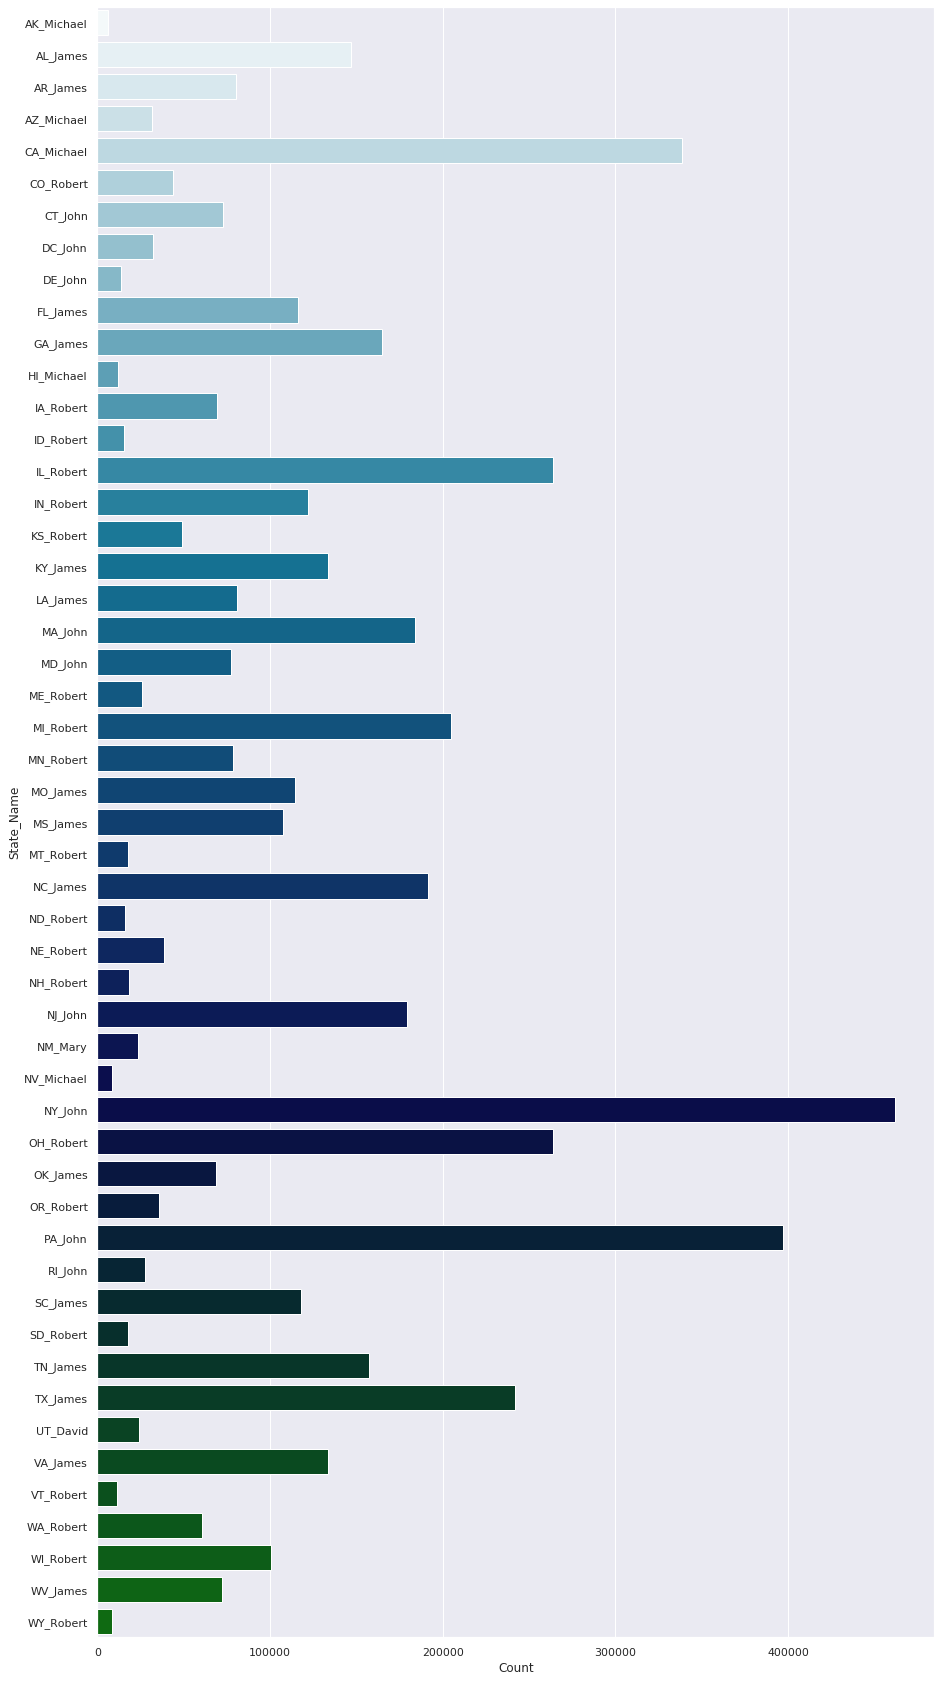

In [7]:
sns.set(rc={'figure.figsize':(15,30)})
ax = sns.barplot(data=popular[popular['Period'] == 'Before'], y='State_Name',x='Count', orient='h', palette = 'ocean_r')

# After

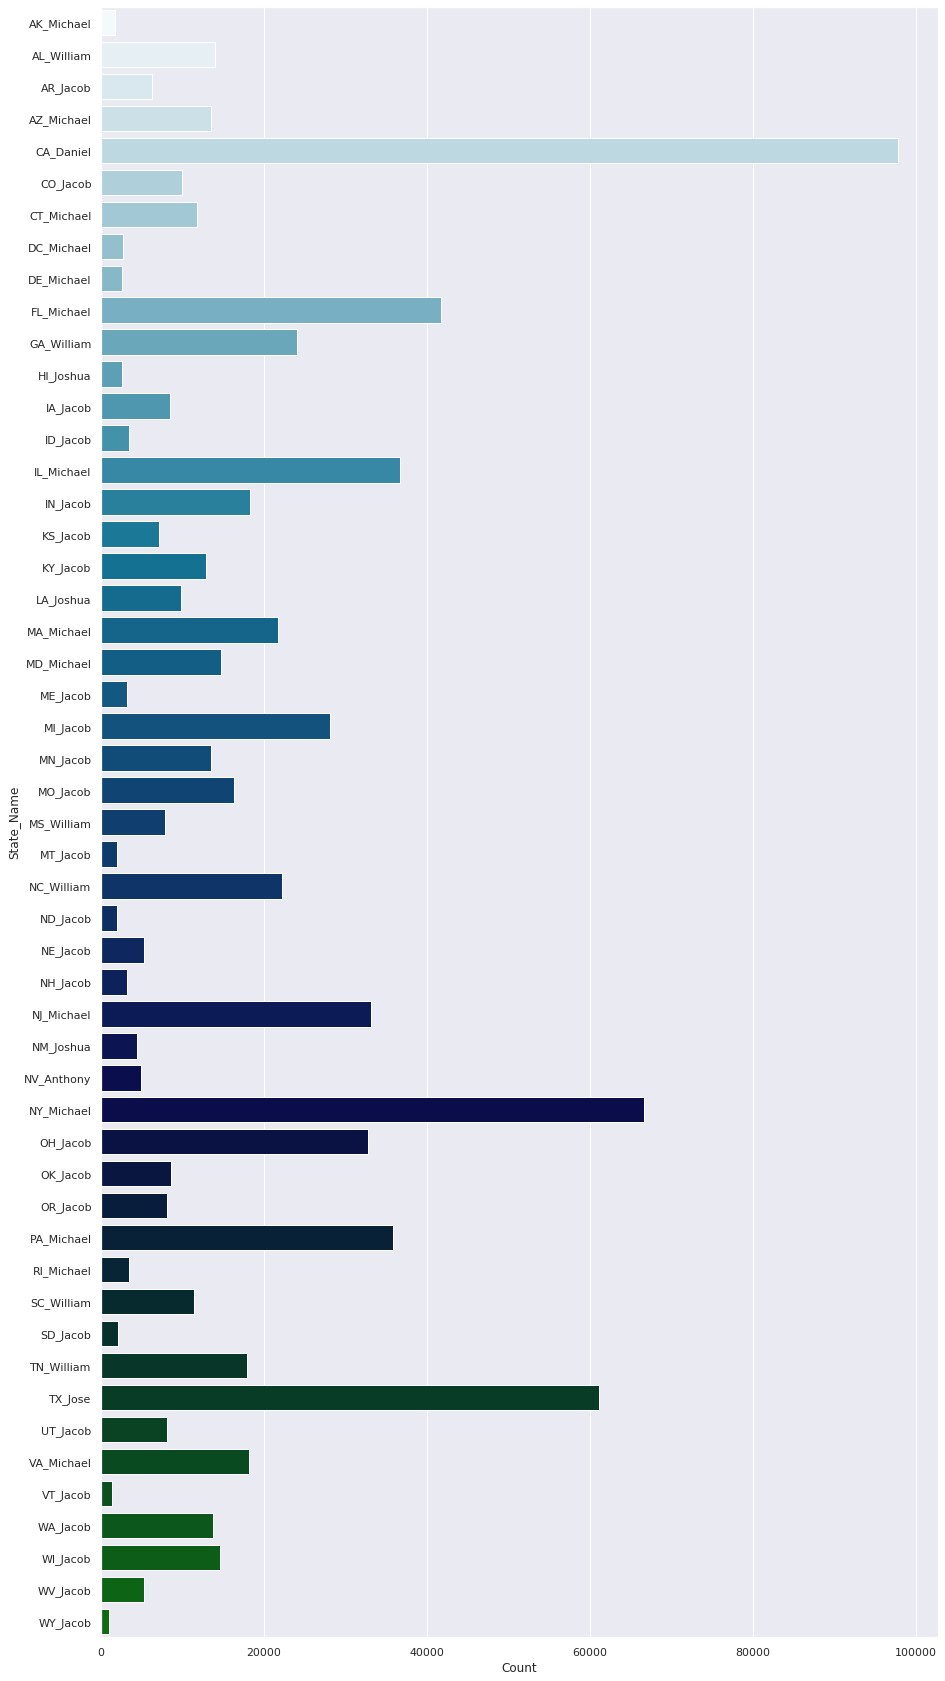

In [8]:
sns.set(rc={'figure.figsize':(15,30)})
ax = sns.barplot(data=popular[popular['Period'] == 'After'], y='State_Name',x='Count', orient='h', palette = 'ocean_r')

# Task 2

In [9]:
top = df[(df['Year'] >= 1990) & (df['Year'] <= 2000) & df['State'].isin(['LA', 'KS', 'AL'])]
top = top.groupby(['State', 'Name', 'Gender']).aggregate({'Count':'sum'}).sort_values('Count', ascending=False)
top = top.groupby(['State', 'Gender']).head(3).reset_index()
top = top.sort_values(['Gender', 'State'])
top

,State,Name,Gender,Count
6,AL,Ashley,F,5306
7,AL,Jessica,F,4979
11,AL,Brittany,F,4208
15,KS,Ashley,F,2970
16,KS,Jessica,F,2844
17,KS,Emily,F,2672
8,LA,Ashley,F,4835
9,LA,Brittany,F,4566
12,LA,Taylor,F,3929
0,AL,William,M,7141


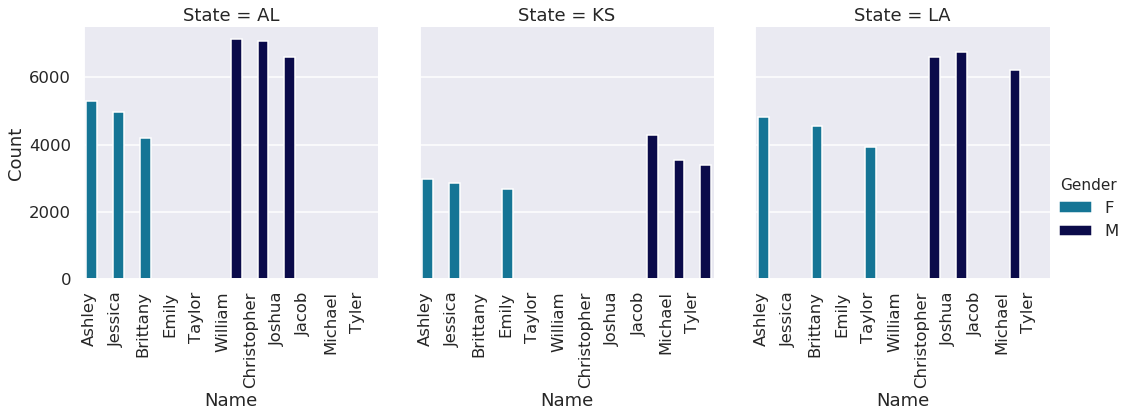

In [10]:
sns.set_context("talk")
facet = sns.catplot(data=top, x="Name", y="Count", col='State', hue='Gender', kind='bar', palette = 'ocean_r')
facet.set_xticklabels(rotation=90, horizontalalignment='right')

# Task 3

In [11]:
df_names = df[(df['Year'] >= 1990) & (df.Name.isin(['Dream', 'Kenny', 'Waylon']))]
df_la = df_names[df_names['State'] == 'LA'] 
df_ks = df_names[df_names['State'] == 'KS'] 
df_al = df_names[df_names['State'] == 'AL'] 

### Names dynamics in Louisiana

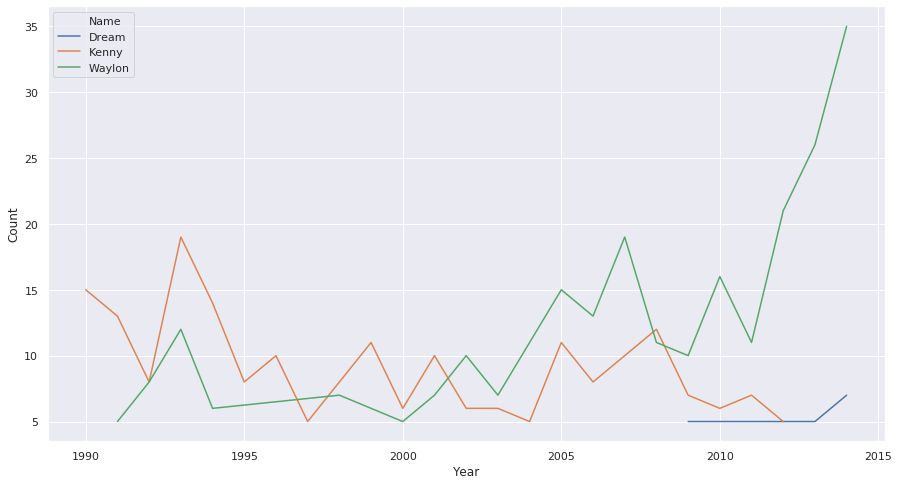

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data = df_la, x = "Year", y = "Count", hue = "Name", ci = None)

### Names dynamics in Kansas

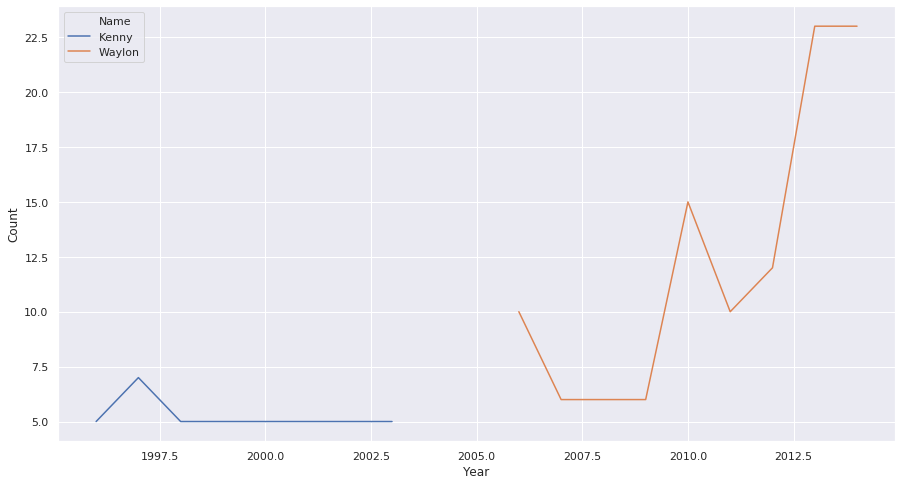

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data = df_ks, x = "Year", y = "Count", hue = "Name", ci = None)

### Names dynamics in Alaska

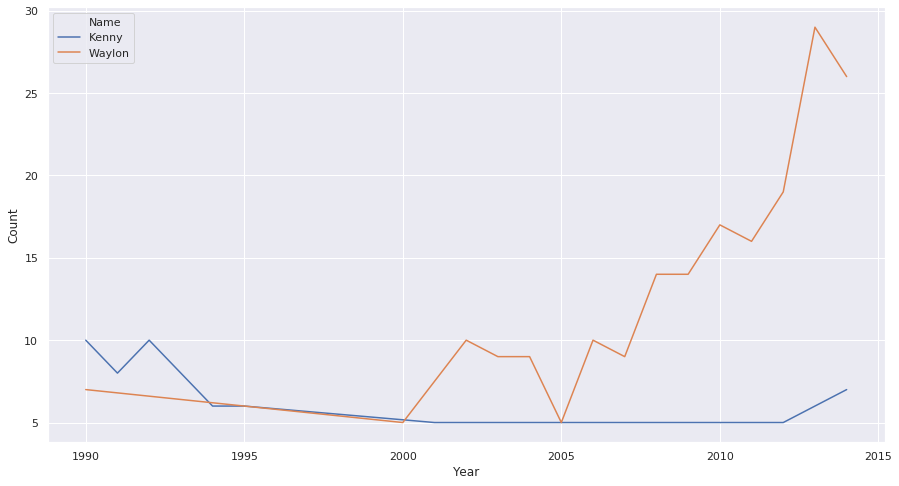

In [14]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data = df_al, x = "Year", y = "Count", hue = "Name", ci = None)